In [31]:
sys.path.append(os.getcwd()+'/..')
sys.path.append(os.getcwd()+'/../Library')
#need to append some paths to PATH variable

import os, sys, pickle
from dataset.mnist import load_mnist
from ipynb.fs.full.activation_function import * #you need to install ipynb package using command : pip(3) install ipynb
from matplotlib.pyplot import imshow 

In [27]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)
print('== Shape of Training & Test set ==')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print('== type & shape of the data ==')
print(x_train[0].shape, type(x_train[0]))
print(y_train[0].shape, type(y_train[0]))
print(x_test[0].shape, type(x_test[0]))
print(y_test[0].shape, type(y_test[0]))


== Shape of Training & Test set ==
(60000, 784)
(60000,)
(10000, 784)
(10000,)
== type & shape of the data ==
(784,) <class 'numpy.ndarray'>
() <class 'numpy.uint8'>
(784,) <class 'numpy.ndarray'>
() <class 'numpy.uint8'>


5


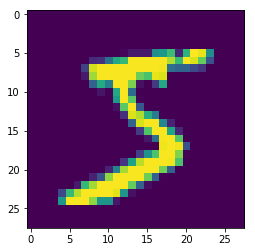

In [29]:
image = x_train[0]
label = y_train[0]
print(label)
imshow(image.reshape(28,28))

In [61]:
#Initializing network
f = open('./MNIST_1_Weights.pkl', 'rb') #read in binary
network = pickle.load(f)
sorted(network.keys())

['W1', 'W2', 'W3', 'b1', 'b2', 'b3']

In [62]:
def predict(X):
    keys = sorted(network.keys())
    W1, W2, W3 = (network[idx] for idx in keys[:3])
    b1, b2, b3 = (network[idx] for idx in keys[3:])

    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    return softmax(a3)

In [107]:
accuracy = 0
wrong_idx = list()

for i in range(len(x_test)):
    y = predict(x_test[i])
    p = np.argmax(y)
    if p == y_test[i]:
        accuracy += 1
    else:
        wrong_idx.append(i)
print('Accuracy: {}'.format(float(accuracy/len(x_test))))

Accuracy: 0.9207


Answer : 9


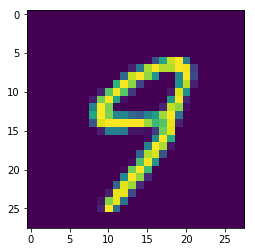

In [121]:
#Show test cases that my network made right answer
from random import randint
idx = randint(0, len(x_test)-1)
y = predict(x_test[idx])
imshow(x_test[idx].reshape(28,28))
print('Answer : {}'.format(np.argmax(y)))

Answer : 8


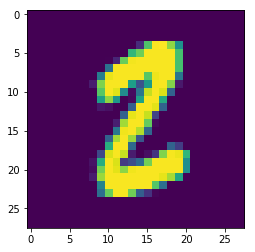

In [122]:
#Show test cases that my network made wrong answer
idx = wrong_idx[randint(0, len(wrong_idx)-1)]
y = predict(x_test[idx])
imshow(x_test[idx].reshape(28, 28))
print('Answer : {}'.format(np.argmax(y)))